In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
wd = os.getcwd()
wd

'C:\\Users\\Nils\\Documents\\KIT-TVWL\\Master\\SS 18\\KD Seminar\\Git\\mlp'

In [3]:
df = pd.read_csv("../final_data/complete_data.csv")
df.Timestamp = pd.to_datetime(df.Timestamp)
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,Timestamp,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,socialScore,nbOfDuplicates,Previous_Day_Return,Next_Day_Return
0,2017-06-01,Samsung,50,0.165618,0.171879,0.084830,0.182180,0.267473,-0.392611,0.46335,1922,2,-0.000448,0.028245
1,2017-06-01,Google,50,0.132876,0.189226,0.016465,0.155235,0.255628,-0.325260,0.58590,5591,3,-0.011524,-0.001194
2,2017-06-01,Apple,50,0.160381,0.204606,0.045303,0.205475,0.304395,-0.486920,0.48226,14547,4,0.002746,0.014710
3,2017-06-01,Tesla,50,0.158812,0.168544,0.032113,0.140007,0.254250,-0.151530,0.55448,31675,1,-0.001879,-0.001529
4,2017-06-01,Bayer,50,0.279171,0.181638,0.093412,0.279715,0.386053,-0.031140,0.71335,8477,7,0.008012,0.021193


In [4]:
df.columns

Index(['Timestamp', 'ID', 'articleCount', 'avgSentiment', 'stdSentiment',
       '25quantileSentiment', '50quantileSentiment', '75quantileSentiment',
       'maxSentiment', 'minSentiment', 'socialScore', 'nbOfDuplicates',
       'Previous_Day_Return', 'Next_Day_Return'],
      dtype='object')

**For now, drop every Column related to IBM**

In [5]:
df = df.dropna(axis=1, how="all")
df.head()

,Timestamp,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,socialScore,nbOfDuplicates,Previous_Day_Return,Next_Day_Return
0,2017-06-01,Samsung,50,0.165618,0.171879,0.084830,0.182180,0.267473,-0.392611,0.46335,1922,2,-0.000448,0.028245
1,2017-06-01,Google,50,0.132876,0.189226,0.016465,0.155235,0.255628,-0.325260,0.58590,5591,3,-0.011524,-0.001194
2,2017-06-01,Apple,50,0.160381,0.204606,0.045303,0.205475,0.304395,-0.486920,0.48226,14547,4,0.002746,0.014710
3,2017-06-01,Tesla,50,0.158812,0.168544,0.032113,0.140007,0.254250,-0.151530,0.55448,31675,1,-0.001879,-0.001529
4,2017-06-01,Bayer,50,0.279171,0.181638,0.093412,0.279715,0.386053,-0.031140,0.71335,8477,7,0.008012,0.021193


In case financial Data is not complete, Drop days without financial data

In [6]:
df = df.dropna(axis=0, how="any")


In [7]:
df["relabeled_returns"] = df["Next_Day_Return"].apply(lambda x: 0 if x < 0 else 1)
df.head()

,Timestamp,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,socialScore,nbOfDuplicates,Previous_Day_Return,Next_Day_Return,relabeled_returns
0,2017-06-01,Samsung,50,0.165618,0.171879,0.084830,0.182180,0.267473,-0.392611,0.46335,1922,2,-0.000448,0.028245,1
1,2017-06-01,Google,50,0.132876,0.189226,0.016465,0.155235,0.255628,-0.325260,0.58590,5591,3,-0.011524,-0.001194,0
2,2017-06-01,Apple,50,0.160381,0.204606,0.045303,0.205475,0.304395,-0.486920,0.48226,14547,4,0.002746,0.014710,1
3,2017-06-01,Tesla,50,0.158812,0.168544,0.032113,0.140007,0.254250,-0.151530,0.55448,31675,1,-0.001879,-0.001529,0
4,2017-06-01,Bayer,50,0.279171,0.181638,0.093412,0.279715,0.386053,-0.031140,0.71335,8477,7,0.008012,0.021193,1


In [8]:
df.shape
no_companies = len(df["ID"].unique())
nr_days = int(df.shape[0] / no_companies)
nr_feats = df.shape[1] -4 #(-3 wegen Timestamp, ID, Next_Day_Return, relabeled_returns)
print("Days {}".format(nr_days))
print("Features {}".format(nr_feats))

Days 142
Features 11


In [9]:
df["Timestamp"].value_counts()[0:2]

2017-10-30    11
2017-12-22    11
Name: Timestamp, dtype: int64

In [10]:
df.tail()

,Timestamp,ID,articleCount,avgSentiment,stdSentiment,25quantileSentiment,50quantileSentiment,75quantileSentiment,maxSentiment,minSentiment,socialScore,nbOfDuplicates,Previous_Day_Return,Next_Day_Return,relabeled_returns
1557,2018-01-09,Airbus,50,0.215128,0.174347,0.074225,0.160525,0.290144,-0.016800,0.70812,11671,9,0.004959,0.036815,1
1558,2018-01-09,Telefonica,1,0.074000,0.000000,0.074000,0.074000,0.074000,0.074000,0.07400,0,0,0.005816,-0.020834,0
1559,2018-01-09,Total,21,-0.157788,0.218980,-0.330690,-0.223240,0.027333,-0.456790,0.22156,10025,4,-0.005561,0.009866,1
1560,2018-01-09,BASF,28,0.247963,0.179020,0.117600,0.278810,0.345882,-0.209300,0.65029,13,0,-0.003268,-0.015108,0
1561,2018-01-09,Bayer,50,0.185845,0.144956,0.106372,0.167415,0.276895,-0.215156,0.54116,18375,7,-0.006323,-0.015606,0


In [11]:
X = []#np.empty((int(nr_days) ,int(nr_feats * 10)))

In [12]:
X = []
labels_to_drop = ["Timestamp", "ID", "Next_Day_Return", "relabeled_returns"]
for d in df["Timestamp"].value_counts().index:
    #print(d)
    X.append(df[df["Timestamp"] == d].drop(labels_to_drop, axis=1).values.reshape(1,nr_feats*no_companies))
len(X)

142

In [13]:
np.array(X).shape

(142, 1, 121)

In [14]:
X = np.array(X).reshape(int(nr_days), nr_feats*no_companies)
X.shape

(142, 121)

Y for Regression

In [15]:
df_labels = df[["Timestamp","Next_Day_Return"]].copy()
df_labels["Next_Day_Return"].values.reshape(nr_days, no_companies)

array([[ 0.02824548, -0.00119383,  0.01471044, ...,  0.00277585,
        -0.00438006,  0.00438102],
       [ 0.01720048, -0.00982618,  0.0217422 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.01592476, -0.01402916,  0.00593895, ..., -0.0055893 ,
        -0.00321967,  0.0190883 ],
       ...,
       [-0.0037212 ,  0.01313371,  0.02498772, ...,  0.00168545,
         0.00917491, -0.00314669],
       [ 0.00796378,  0.00495878, -0.00556141, ..., -0.00811824,
        -0.00326815, -0.00011472],
       [-0.00022948, -0.00890874,  0.00074804, ...,  0.00986566,
        -0.01510828, -0.01560622]])

Y for Classification

In [16]:
df_labels = df[["Timestamp","relabeled_returns"]].copy()
df_labels["relabeled_returns"].values.reshape(nr_days, no_companies)

array([[1, 0, 1, ..., 1, 0, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 1, 0, 0]], dtype=int64)

In [17]:
#df_labels_single = df_labels.groupby("Timestamp").agg("last")

In [18]:
#df_labels_single.head()

In [19]:
#Y = df_labels["Next_Day_Return"].values.reshape(nr_days, 10)#df_labels_single.values
Y = df_labels["relabeled_returns"].values.reshape(nr_days, no_companies)
Y.shape

(142, 11)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler      = MinMaxScaler(feature_range=(0, 1))
rescaled    = scaler.fit_transform(X)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LeakyReLU

from keras import backend as K

from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras import optimizers
from keras.losses import binary_crossentropy
#from keras.optimizers import SGD

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

C:\Users\Nils\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
X_train, X_val, y_train, y_val = train_test_split(rescaled, Y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
dims = X.shape[1]
print(dims, 'dims')
print("Building model...")

nb_classes = Y.shape[1]
print(nb_classes, 'classes')

121 dims
Building model...
11 classes


In [24]:
print(X_train.shape)
print(y_train.shape)

(113, 121)
(113, 11)


### Andi

In [ ]:
model = Sequential()

# Add layers
model.add(Dense(Y.shape[1], input_shape=(dims,), kernel_initializer='uniform', activation="relu"))
model.add(Dense(Y.shape[1]**2, kernel_initializer='uniform', activation="relu"))
model.add(Dense(Y.shape[1]**2, kernel_initializer='uniform', activation="relu"))
model.add(Dense(Y.shape[1], kernel_initializer='uniform', activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="SGD",
              metrics=['accuracy']) # Accuracy performance metric

hist = model.fit(X_train, y_train,
                 epochs=100,
                 batch_size=30,
                 verbose=2,
                 validation_data=(X_val, y_val))

### PREDICTION ###
y_pred = model.predict(X_val)
y_head = np.round(y_pred, 0)

### EVALUATE Classification - MODEL ###

score = model.evaluate(X_val, y_val,verbose=1)


In [77]:
score

[-1.3606109619140625, 0.13333334028720856]

In [37]:
y_train[0]

array([-1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1], dtype=int64)

### Nils

In [34]:
def make_model(optimizer="sgd", dropout=True, dropout_param=0.3, hidden_layer_sizes=[50,100,50], input_activation="relu"):
    
    model = Sequential()
    #Input Layer
    model.add(Dense(nb_classes, input_shape=(dims,), activation=input_activation))
    
    #Hidden Layers
    model.add(Dense(hidden_layer_sizes[0], activation="relu"))#, use_bias=True)) #activation=LeakyReLU(alpha=0.3)
    if dropout:
        model.add(Dropout(dropout_param))
    model.add(Dense(hidden_layer_sizes[1], activation="relu"))#, use_bias=True))
    if dropout:
        model.add(Dropout(dropout_param))
    model.add(Dense(hidden_layer_sizes[2], activation="relu"))#, use_bias=True))

    #Output Layer
    model.add(Dense(nb_classes, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [41]:
my_classifier = KerasClassifier(make_model,  verbose=2) #batch_size=10, epochs=100,

batch_size = [10,12,14,30]#np.arange(55,105,10)
epochs = [70]#np.arange(80,120,5)
optimizer = ["sgd"]#["sgd", "adam", "nadam"]
#dropout = [True, False]
dropout_param = np.linspace(0.29, 0.38, 10)
input_activation=["relu", "tanh", "sigmoid", "softplus"]


param_grid = dict(epochs=epochs, dropout_param=dropout_param, input_activation=input_activation)

validator = GridSearchCV(my_classifier,
                         param_grid=param_grid)
                         #scoring=["accuracy"])
                         #n_jobs=2)
validator.fit(X_train, y_train)


Epoch 1/70
 - 2s - loss: 0.6966 - acc: 0.5030
Epoch 2/70
 - 0s - loss: 0.6967 - acc: 0.4933
Epoch 3/70
 - 0s - loss: 0.6950 - acc: 0.5115
Epoch 4/70
 - 0s - loss: 0.6971 - acc: 0.4921
Epoch 5/70
 - 0s - loss: 0.6973 - acc: 0.4788
Epoch 6/70
 - 0s - loss: 0.6978 - acc: 0.4800
Epoch 7/70
 - 0s - loss: 0.6972 - acc: 0.4958
Epoch 8/70
 - 0s - loss: 0.6948 - acc: 0.5091
Epoch 9/70
 - 0s - loss: 0.6930 - acc: 0.5018
Epoch 10/70
 - 0s - loss: 0.6914 - acc: 0.5309
Epoch 11/70
 - 0s - loss: 0.6952 - acc: 0.5079
Epoch 12/70
 - 0s - loss: 0.6979 - acc: 0.4739
Epoch 13/70
 - 0s - loss: 0.6952 - acc: 0.5042
Epoch 14/70
 - 0s - loss: 0.6929 - acc: 0.5248
Epoch 15/70
 - 0s - loss: 0.6931 - acc: 0.5139
Epoch 16/70
 - 0s - loss: 0.6978 - acc: 0.5006
Epoch 17/70
 - 0s - loss: 0.6950 - acc: 0.5176
Epoch 18/70
 - 0s - loss: 0.6948 - acc: 0.5127
Epoch 19/70
 - 0s - loss: 0.6952 - acc: 0.5055
Epoch 20/70
 - 0s - loss: 0.6963 - acc: 0.5018
Epoch 21/70
 - 0s - loss: 0.6949 - acc: 0.5115
Epoch 22/70
 - 0s - lo

GridSearchCV(cv=None, error_score='raise',
       estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000259ACAA8A90>,
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'epochs': [70], 'dropout_param': array([0.29, 0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38]), 'input_activation': ['relu', 'tanh', 'sigmoid', 'softplus']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
validator.estimator.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=50, verbose=2)

Train on 113 samples, validate on 29 samples
Epoch 1/50
 - 7s - loss: 0.7118 - acc: 0.4722 - val_loss: 0.7073 - val_acc: 0.4608
Epoch 2/50
 - 0s - loss: 0.7138 - acc: 0.4666 - val_loss: 0.7067 - val_acc: 0.4608
Epoch 3/50
 - 0s - loss: 0.7065 - acc: 0.4851 - val_loss: 0.7062 - val_acc: 0.4608
Epoch 4/50
 - 0s - loss: 0.7107 - acc: 0.4859 - val_loss: 0.7057 - val_acc: 0.4608
Epoch 5/50
 - 0s - loss: 0.7063 - acc: 0.4811 - val_loss: 0.7052 - val_acc: 0.4514
Epoch 6/50
 - 0s - loss: 0.7094 - acc: 0.4851 - val_loss: 0.7047 - val_acc: 0.4514
Epoch 7/50
 - 0s - loss: 0.7083 - acc: 0.4739 - val_loss: 0.7041 - val_acc: 0.4577
Epoch 8/50
 - 0s - loss: 0.7104 - acc: 0.4634 - val_loss: 0.7036 - val_acc: 0.4577
Epoch 9/50
 - 0s - loss: 0.7092 - acc: 0.4771 - val_loss: 0.7032 - val_acc: 0.4608
Epoch 10/50
 - 0s - loss: 0.7037 - acc: 0.4779 - val_loss: 0.7029 - val_acc: 0.4608
Epoch 11/50
 - 0s - loss: 0.7037 - acc: 0.4988 - val_loss: 0.7025 - val_acc: 0.4608
Epoch 12/50
 - 0s - loss: 0.6997 - acc: 

In [42]:
print('The parameters of the best model are: ')
print(validator.best_params_)
print(validator.best_score_)

The parameters of the best model are: 
{'dropout_param': 0.37, 'epochs': 70, 'input_activation': 'softplus'}
0.5317779721411984


In [44]:
test = make_model(dropout_param=0.37, input_activation="softmax").fit(X_train, y_train, 
                                                                       validation_data = (X_val, y_val), epochs=70, verbose=2)
          #batch_size=60, verbose=True)

Train on 113 samples, validate on 29 samples
Epoch 1/70
 - 7s - loss: 0.6928 - acc: 0.5157 - val_loss: 0.6934 - val_acc: 0.5204
Epoch 2/70
 - 0s - loss: 0.6934 - acc: 0.5028 - val_loss: 0.6934 - val_acc: 0.5141
Epoch 3/70
 - 0s - loss: 0.6935 - acc: 0.4980 - val_loss: 0.6934 - val_acc: 0.5204
Epoch 4/70
 - 0s - loss: 0.6930 - acc: 0.5012 - val_loss: 0.6934 - val_acc: 0.5141
Epoch 5/70
 - 0s - loss: 0.6929 - acc: 0.5093 - val_loss: 0.6934 - val_acc: 0.5141
Epoch 6/70
 - 0s - loss: 0.6931 - acc: 0.5076 - val_loss: 0.6934 - val_acc: 0.5141
Epoch 7/70
 - 0s - loss: 0.6931 - acc: 0.5020 - val_loss: 0.6934 - val_acc: 0.5110
Epoch 8/70
 - 0s - loss: 0.6932 - acc: 0.4932 - val_loss: 0.6933 - val_acc: 0.5110
Epoch 9/70
 - 0s - loss: 0.6935 - acc: 0.4867 - val_loss: 0.6933 - val_acc: 0.5172
Epoch 10/70
 - 0s - loss: 0.6934 - acc: 0.4988 - val_loss: 0.6933 - val_acc: 0.5172
Epoch 11/70
 - 0s - loss: 0.6937 - acc: 0.4811 - val_loss: 0.6933 - val_acc: 0.5204
Epoch 12/70
 - 0s - loss: 0.6932 - acc: 

In [29]:
import matplotlib.pyplot as plt

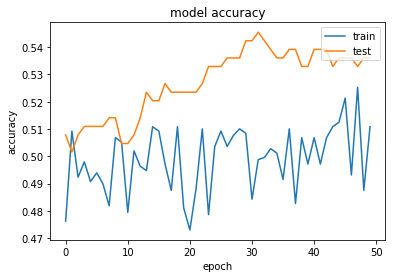

In [30]:
plt.plot(test.history['acc'])
plt.plot(test.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

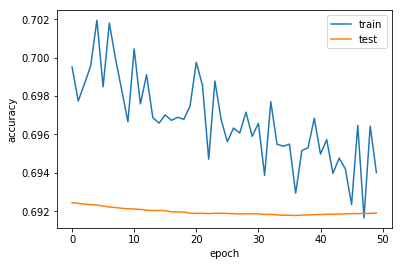

In [33]:
plt.plot(test.history['loss'])
plt.plot(test.history['val_loss'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

In [79]:
model = Sequential()

#Optimizer
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.6, nesterov=True)

#Input Layer
model.add(Dense(nb_classes, input_shape=(dims,), activation="softmax"))#LeakyReLU(alpha=0.3)

#Hidden Layers
model.add(Dense(300, activation=LeakyReLU(alpha=0.3), use_bias=True))
model.add(Dropout(0.4))
model.add(Dense(500, activation="relu", use_bias=True))
model.add(Dropout(0.5))
model.add(Dense(300, activation="relu", use_bias=True))
#model.add(Activation('softplus'))

#Output Layer
model.add(Dense(nb_classes, activation="sigmoid"))


model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=["accuracy"])

model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=30, 
          batch_size=128, verbose=True)

score = model.evaluate(X_val, y_val,verbose=1)

C:\Users\Nils\Anaconda3\lib\site-packages\keras\activations.py:103: UserWarning: Do not pass a layer instance (such as LeakyReLU) as the activation argument of another layer. Instead, advanced activation layers should be used just like any other layer in a model.
  ).format(identifier=identifier.__class__.__name__))


Train on 79 samples, validate on 20 samples
Epoch 1/30
79/79 [==============================] - 1s 13ms/step - loss: 0.6909 - acc: 0.2278 - val_loss: 0.6894 - val_acc: 0.2000
Epoch 2/30
79/79 [==============================] - 0s 202us/step - loss: 0.6894 - acc: 0.2186 - val_loss: 0.6891 - val_acc: 0.2000
Epoch 3/30
79/79 [==============================] - 0s 380us/step - loss: 0.6903 - acc: 0.2221 - val_loss: 0.6887 - val_acc: 0.1864
Epoch 4/30
79/79 [==============================] - 0s 329us/step - loss: 0.6891 - acc: 0.2083 - val_loss: 0.6884 - val_acc: 0.1727
Epoch 5/30
79/79 [==============================] - 0s 380us/step - loss: 0.6889 - acc: 0.2048 - val_loss: 0.6880 - val_acc: 0.1591
Epoch 6/30
79/79 [==============================] - 0s 380us/step - loss: 0.6885 - acc: 0.1933 - val_loss: 0.6877 - val_acc: 0.1455
Epoch 7/30
79/79 [==============================] - 0s 392us/step - loss: 0.6899 - acc: 0.1772 - val_loss: 0.6873 - val_acc: 0.1409
Epoch 8/30
79/79 [===============

In [95]:
score

[-8.998761177062988, 0.0]

In [58]:
E = model.predict(X[0].reshape(1,90))
E

array([[0.0000000e+00, 1.0000000e+00, 1.2261952e-27, 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00, 6.2738419e-01, 1.0000000e+00,
        0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [59]:
Y[0]

array([-0.01721889, -0.05705099, -0.01746398, -0.00918132,  0.00061175,
        0.00181067,  0.00350719, -0.0202173 ,  0.        , -0.01004057])

In [139]:
EY[0]

array([[ 0.04923758,  0.05990248,  0.12029236,  0.14767935,  0.1304228 ,
         0.04514487,  0.12636857,  0.00601043,  0.12278158,  0.1271591 ]])